# US-Workshop (2023): ULTRASOUND BASICS
<hr/>

## EX1: Envelop detection on pulse-echo signal
* In ultrasound we usually transmit short signals (bursts) and register the echo signal.
* Effectively, the ultrasound transducer fundamental frequency is a carrier frequency that is modulated like in AM (Amplitude Modulation) radio technique.
* On receive, we perform envelop detection (or proper demodulation) to get rid of the ultrasound carrier signal.
* There are many method to perform the demodulation and/or envelop detection - we are presenting some of them below.

### TOC
* [ASYNCHRONOUS HALF-WAVE ENVELOPE DETECTION](#asynchronous-half-wave-envelope-detection)
* [ASYNCHRONOUS FULL-WAVE ENVELOPE DETECTION](#asynchronous-full-wave-envelope-detection)
* [ASYNCHRONOUS REAL SQUARE-LAW ENVELOPE DETECTION](#asynchronous-real-square-law-envelope-detection)
* [ASYNCHRONOUS COMPLEX ENVELOPE DETECTION](#asynchronous-complex-envelope-detection)
* [ASYNCHRONOUS COMPLEX SQUARE-LAW ENVELOPE DETECTION](#asynchronous-complex-square-law-envelope-detection)
* [SYNCHRONOUS REAL ENVELOPE DETECTION](#synchronous-real-envelope-detection)
* [ASYNCHRONOUS COMPLEX ENVELOPE DETECTION (VERSION 1)](#asynchronous-complex-envelope-detection-(version-1))
* [ASYNCHRONOUS COMPLEX ENVELOPE DETECTION (VERSION 2)](#asynchronous-complex-envelope-detection-(version-2))


### LINKS
1. [Rick Lyons, Digital Envelope Detection: The Good, the Bad, and the Ugly](https://www.dsprelated.com/showarticle/938.php)
2. [Envelope Detection in MATLAB](https://www.mathworks.com/help/dsp/ug/envelope-detection.html)
3. [scipy.signal.hilbert](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html)
4. [Why Hilbert Transform is terrible choice for amplitude demodulation of broadband signals?](https://dsp.stackexchange.com/questions/83255/why-hilbert-transform-is-terrible-choice-for-amplitude-demodulation-of-broadband)
5. [Youtube: AM Demodulation - Envelope Detector Explained (with Simulation)](https://www.youtube.com/watch?v=4JrryefRNFk)

[![Lab4US](../figs/Lab4US-banner-EN-800.png)](https://lab4us.eu)
<hr/>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from envelop_detection import *

In [2]:
# %% GENERATE AM (Amplitude Modulated) RF SIGNAL

# example (source: https://github.com/shiva34/Digital-Modulation-Schemes/blob/main/AM/AM.m)

m = 1.      # Modulation Index (=<1.0)
Am = 1.     # Amplitude of the modulating signal
fm = 10.    # Frequency of the modulating signal [Hz]
fs = 100.*fm  # Sampling frequency [Hz]
Tm = 1/fm    # Time period of the modulating signal
# create time axis for 3 periods of the modulating signal
t = np.arange(0, 3*Tm, 1/fs)
ym = Am*np.sin(2*math.pi*fm*t)  # generated modulating signal

# Generating the carrier signal
# Amplitude of the carrier signal is minimum magnitude of message signal(Am) / modulation index(m)
Ac = Am/m
# Frequency of carrier signal (we assume it to be 20 times the frequency of message signal.)
fc = 20*fm
yc = Ac*np.cos(2*math.pi*fc*t)  # The generated Carrier signal

# Modulating message signal to carrier signal using AM modulation
# AM = yc*(1+m*ym/Am)
AM = yc*m*ym/Am

Text(0.5, 0, 'Time [s]')

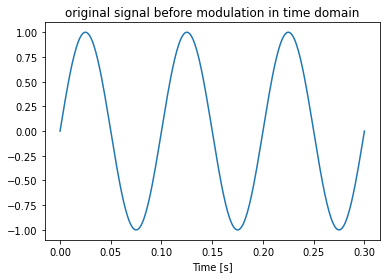

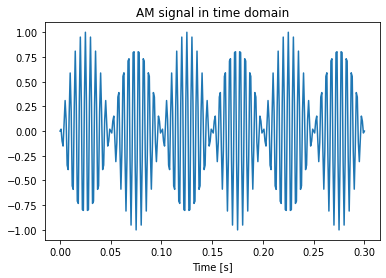

In [3]:
# %% PLOT MODULATING and AM SIGNALS

fig, axs = plt.subplots()
axs.plot(t, ym)
axs.set_title('original signal before modulation in time domain')
axs.set_xlabel('Time [s]')

fig, axs = plt.subplots()
axs.plot(t, AM)
axs.set_title('AM signal in time domain')
axs.set_xlabel('Time [s]')

## ASYNCHRONOUS HALF-WAVE ENVELOPE DETECTION


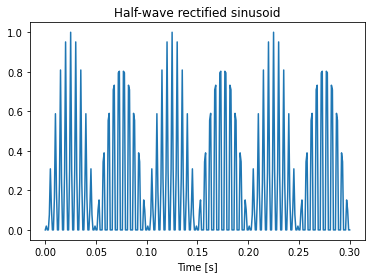

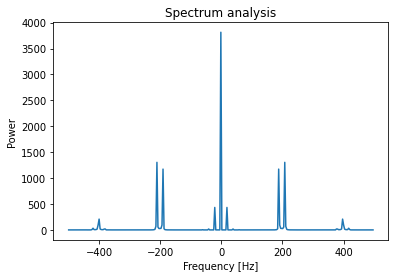

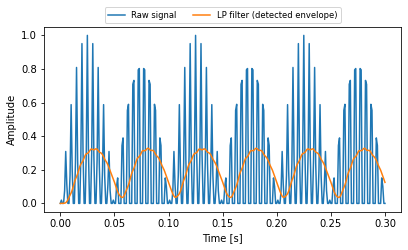

In [4]:
output = asynchronous_half_wave(AM, t, fs, cutoff_freq=50)

## ASYNCHRONOUS FULL-WAVE ENVELOPE DETECTION


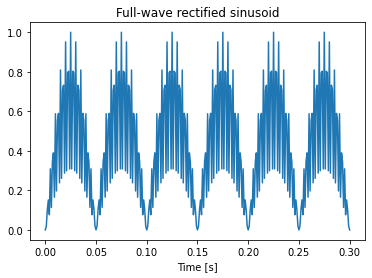

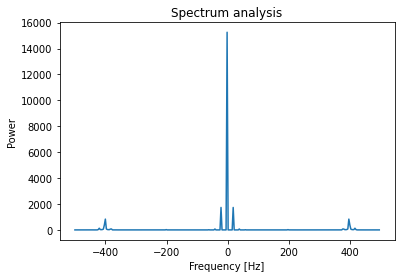

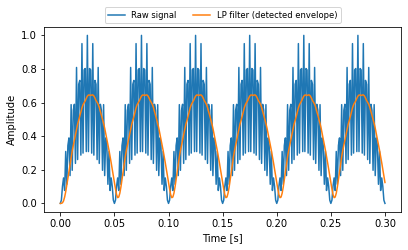

In [5]:
output = asynchronous_full_wave(AM, t, fs, cutoff_freq=100)

## ASYNCHRONOUS REAL SQUARE-LAW ENVELOPE DETECTION


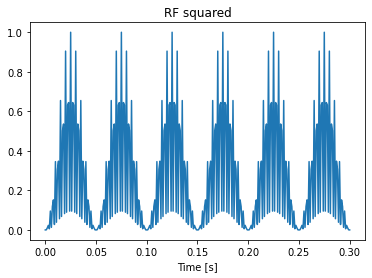

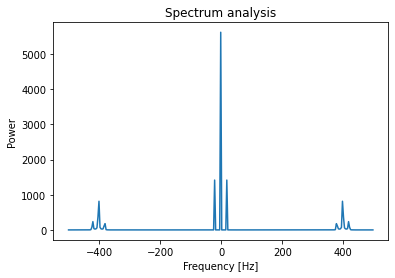

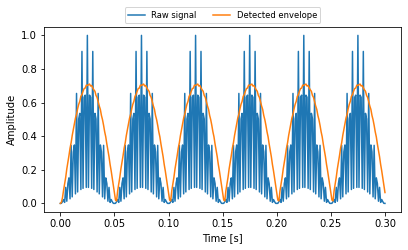

In [6]:
output = asynchronous_real_square_law(AM, t, fs, cutoff_freq=200)

## ASYNCHRONOUS COMPLEX ENVELOPE DETECTION


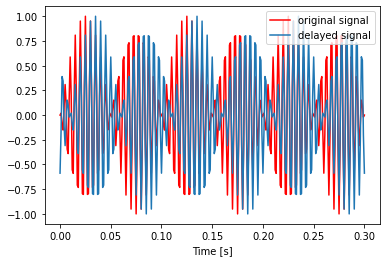

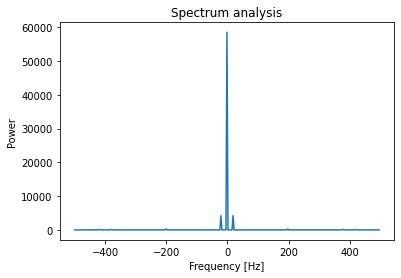

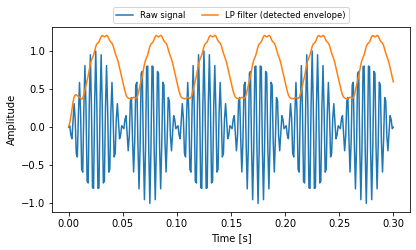

In [7]:
output = asynchronous_complex_hilbert(AM, t, fs, cutoff_freq=100)

## ASYNCHRONOUS COMPLEX SQUARE-LAW ENVELOPE DETECTION


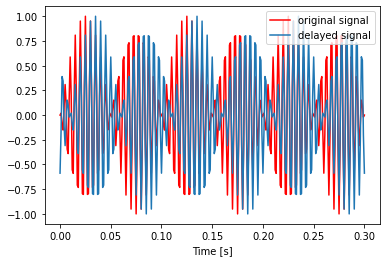

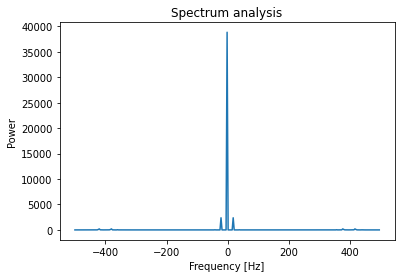

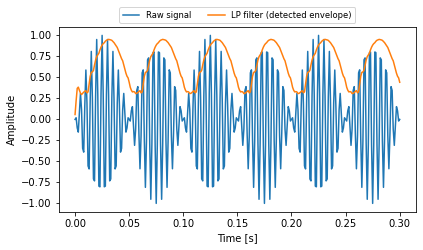

In [8]:
output = asynchronous_complex_square_law(AM, t, fs, cutoff_freq=200)

## SYNCHRONOUS REAL ENVELOPE DETECTION


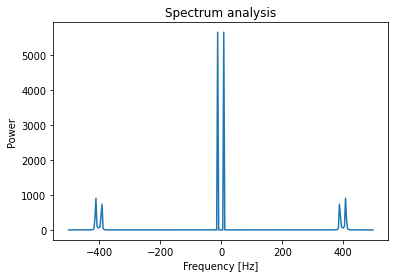

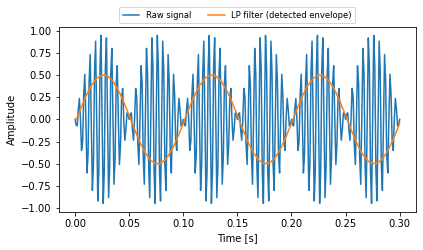

In [9]:
output = synchronous_real(Ac, fc, m, ym, Am, t, fs, cutoff_freq=200)

## ASYNCHRONOUS COMPLEX ENVELOPE DETECTION (VERSION 1)


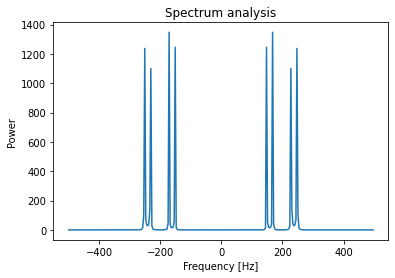

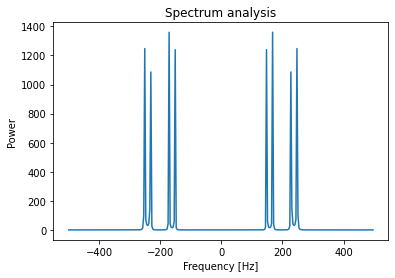

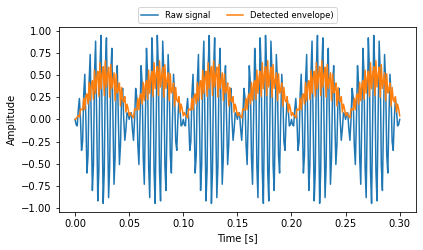

In [10]:
output = asynchronous_complex_V1_osci(Ac, fc, m, ym, Am, t, fs, cutoff_freq=200)

## ASYNCHRONOUS COMPLEX ENVELOPE DETECTION (VERSION 2)


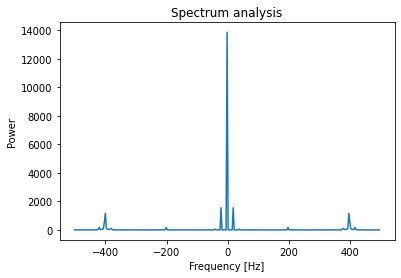

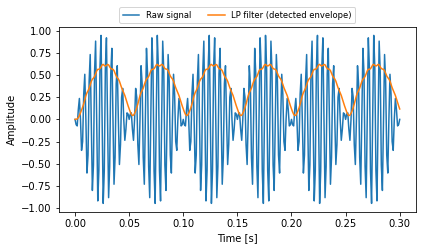

In [11]:
output = asynchronous_complex_V2_osci(Ac, fc, m, ym, Am, t, fs, cutoff_freq=100)